In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# model_id = "aanaxs4g"
model_id = "leuo8izn"
# model_id = "ezb3xkqf"
# gradCAM_file_name = "egknzmgs_gradCAM" # gradCAM model
# gradCAM_file_name = "8urp1dmm_gradCAM" # gradCAM model

# model_id = "egknzmgs" # gradCAM model
# model_id = "8urp1dmm"

In [2]:
ev_gdf = gpd.read_file("Output/Evaluation/"+model_id+".shp")

In [3]:
ev_gdf.head()

,patch_name,true_val,leuo8izn,geometry
0,Indiana_2020_july_3328-2816,3.800568,4.359397,"POLYGON ((-86.16658 40.10565, -86.30456 40.105..."
1,Indiana_2020_july_3072-3584,0.847230,0.613615,"POLYGON ((-86.30456 39.69170, -86.44254 39.691..."
2,Indiana_2019_july_2048-1024,1.534634,1.528363,"POLYGON ((-86.85649 41.07151, -86.99447 41.071..."
3,Indiana_2020_july_2048-4608,1.180629,0.908209,"POLYGON ((-86.85649 39.13978, -86.99447 39.139..."
4,Indiana_2018_july_4096-2560,3.304477,3.486326,"POLYGON ((-85.75264 40.24363, -85.89062 40.243..."


In [4]:
ev_gdf.shape

(2009, 4)

In [5]:
vmin = np.min(np.array(ev_gdf.loc[:,["true_val",model_id]]))
vmax = np.max(np.array(ev_gdf.loc[:,["true_val",model_id]]))

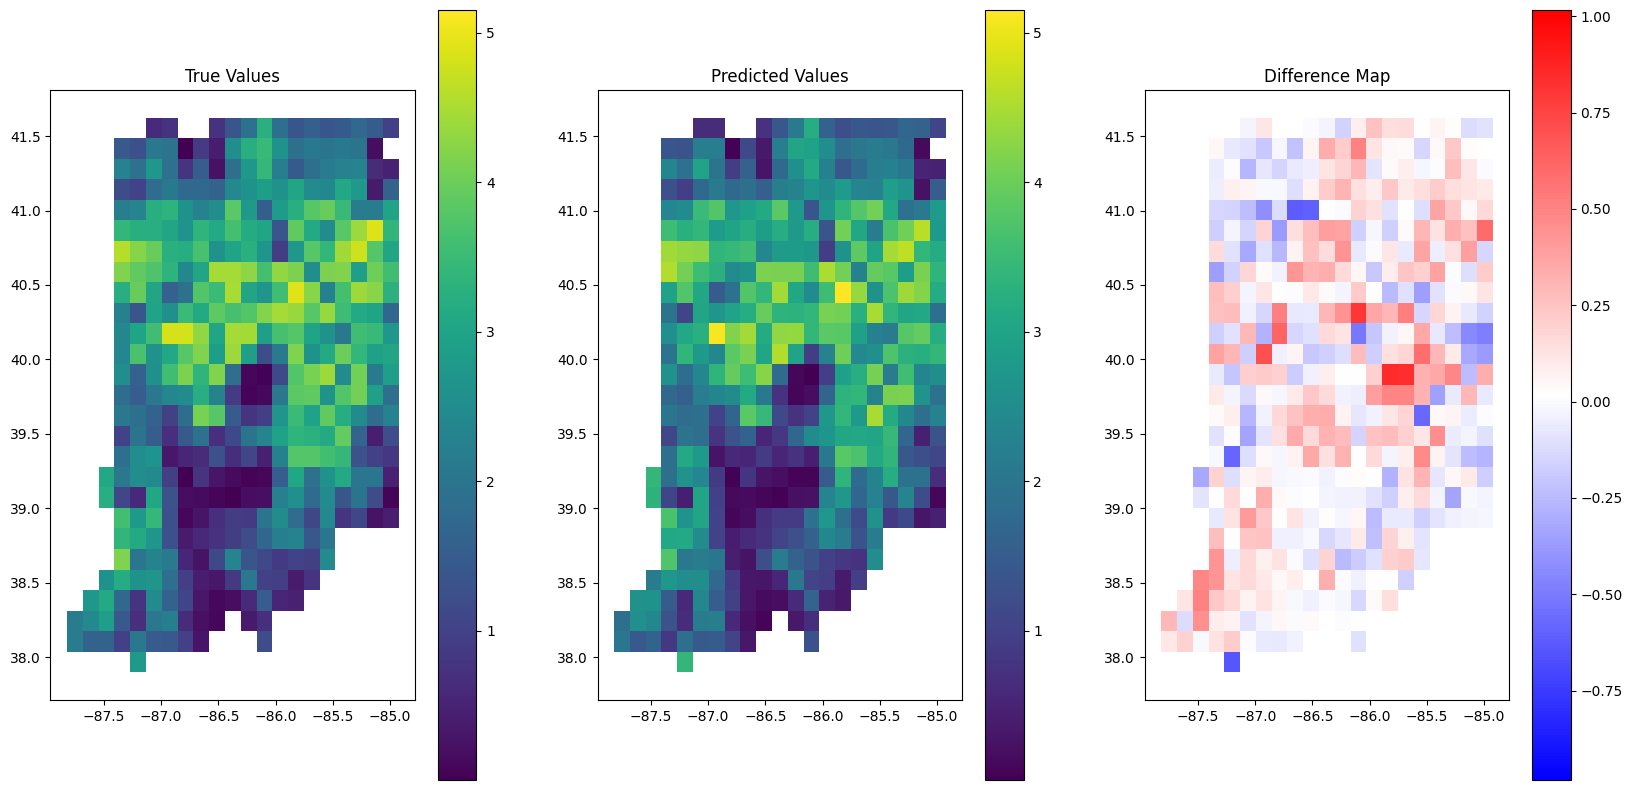

In [28]:
fig,ax = plt.subplots(1,3,figsize=(20,10))

ax[0].set_title("True Values")
ev_gdf.plot(column='true_val',ax=ax[0],legend=True,vmin=vmin,vmax=vmax,)
ax[1].set_title("Predicted Values")
ev_gdf.plot(column=model_id,ax=ax[1],legend = True,vmin=vmin,vmax=vmax)
ax[2].set_title("Difference Map")
ev_gdf["diff"] = ev_gdf["true_val"] - ev_gdf[model_id]
ev_gdf.plot(column = "diff",ax=ax[2],legend = True,cmap="bwr")

plt.savefig("Output/Evaluation/true_pred_diff_"+model_id+".png")

In [16]:
ev_gdf.corr()

,true_val,leuo8izn,diff
true_val,1.000000,0.982565,0.213832
leuo8izn,0.982565,1.000000,0.028485
diff,0.213832,0.028485,1.000000


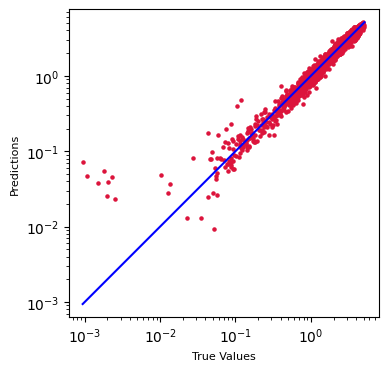

In [17]:
true_value = ev_gdf["true_val"]
predicted_value = ev_gdf[model_id]
plt.figure(figsize=(4,4))
plt.scatter(true_value, predicted_value, c='crimson',s=5)
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=8)
plt.ylabel('Predictions', fontsize=8)
plt.axis('equal')
plt.show()

In [10]:
# pd.plotting.scatter_matrix(ev_gdf_1)

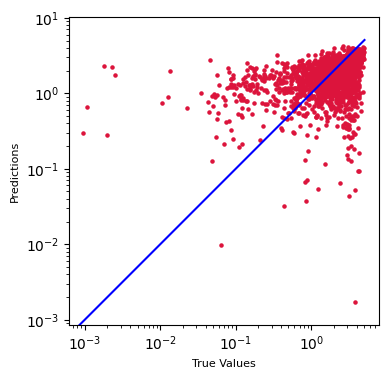

In [18]:
model_id_1 = "vosvg9hw"
ev_gdf_1 = gpd.read_file("Output/Evaluation/"+model_id_1+".shp")
true_value1 = ev_gdf_1["true_val"]
predicted_value1 = ev_gdf_1[model_id_1]
plt.figure(figsize=(4,4))
plt.scatter(true_value1, predicted_value1, c='crimson',s=5)
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value1), max(true_value1))
p2 = min(min(predicted_value1), min(true_value1))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=8)
plt.ylabel('Predictions', fontsize=8)
plt.axis('equal')
plt.show()

In [24]:
ev_gdf_1.corr()

,true_val,vosvg9hw
true_val,1.000000,0.474928
vosvg9hw,0.474928,1.000000


In [19]:
model_id0 = "vosvg9hw"
ev_gdf_0 = gpd.read_file("Output/Evaluation/"+model_id0+".shp")
true_value0 = ev_gdf_0["true_val"]
predicted_value0 = ev_gdf_0[model_id0]

<AxesSubplot: title={'center': 'Difference Map'}>

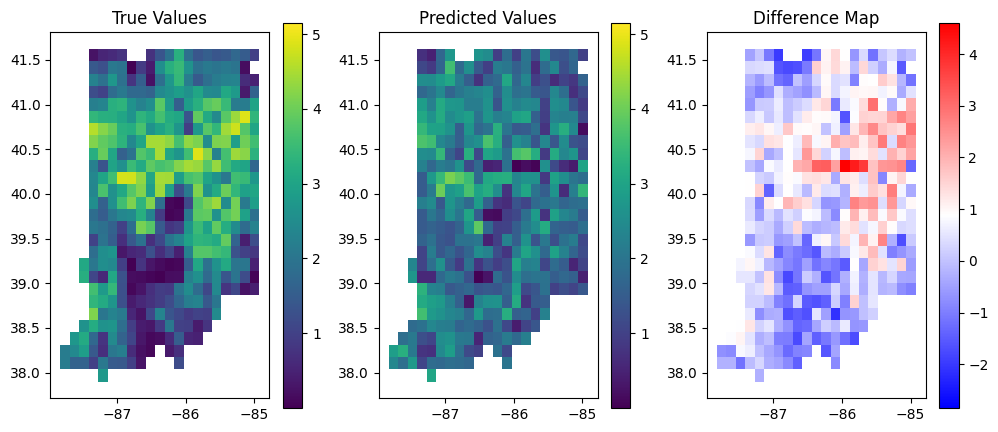

In [21]:
fig,ax = plt.subplots(1,3,figsize=(12,5))

ax[0].set_title("True Values")
ev_gdf_0.plot(column='true_val',ax=ax[0],legend=True,vmin=vmin,vmax=vmax,)
ax[1].set_title("Predicted Values")
ev_gdf_0.plot(column=model_id0,ax=ax[1],legend = True,vmin=vmin,vmax=vmax)
ax[2].set_title("Difference Map")
ev_gdf_0["diff"] = ev_gdf_0["true_val"] - ev_gdf_0[model_id0]
ev_gdf_0.plot(column = "diff",ax=ax[2],legend = True,cmap="bwr")

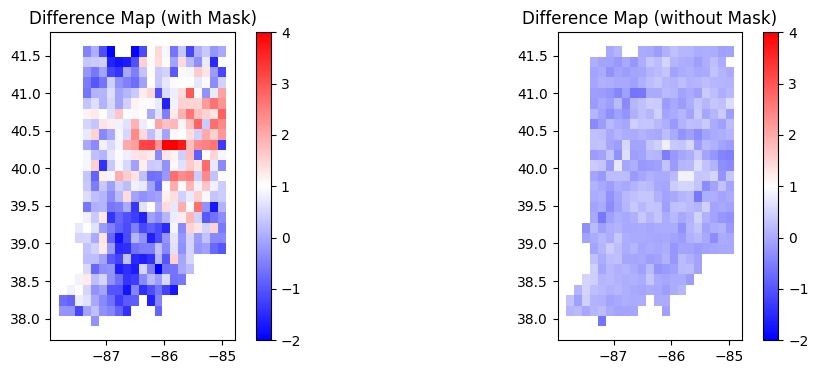

In [23]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].set_title("Difference Map (with Mask)")

ev_gdf_0["diff"] = ev_gdf_0["true_val"] - ev_gdf_0[model_id0]
ev_gdf_0.plot(column = "diff",ax=ax[0],legend = True,cmap="bwr",vmin=-2,vmax=4)

ax[1].set_title("Difference Map (without Mask)")
ev_gdf["diff"] = ev_gdf["true_val"] - ev_gdf[model_id]
ev_gdf.plot(column = "diff",ax=ax[1],legend = True,cmap="bwr",vmin=-2,vmax=4)


plt.savefig("Output/Evaluation/difference_plot.png")

In [28]:
'diff == "'+str(ev_gdf_0["diff"].min())+'"'

'diff == "-0.5859498339089839"'

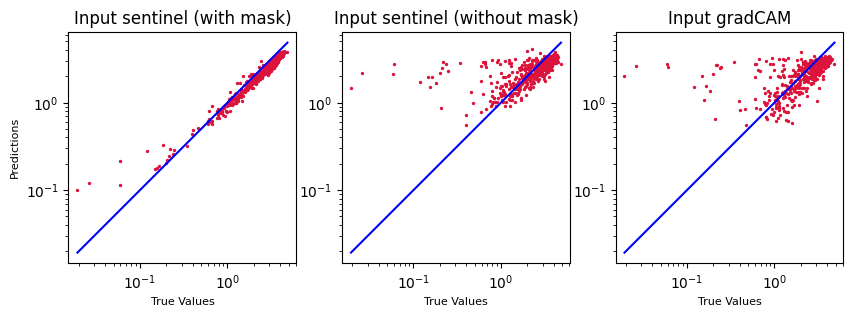

In [32]:
fig,ax = plt.subplots(1,3,figsize=(10,3))
ax[0].set_title("Input sentinel (with mask)")
ax[1].set_title("Input sentinel (without mask)")
ax[2].set_title("Input gradCAM")
# plt.figure(figsize=(4,4))
ax[0].scatter(true_value0, predicted_value0, c='crimson',s=2)
ax[0].set_yscale('log')
ax[0].set_xscale('log')

p1_0 = max(max(predicted_value0), max(true_value0))
p2_0 = min(min(predicted_value0), min(true_value0))
ax[0].plot([p1_0, p2_0], [p1_0, p2_0], 'b-')
ax[0].set_xlabel('True Values', fontsize=8)
ax[0].set_ylabel('Predictions', fontsize=8)
ax[0].axis('equal')



model_id_1 = "ezb3xkqf"
ev_gdf_1 = gpd.read_file("Output/Evaluation/"+model_id_1+".shp")
true_value1 = ev_gdf_1["true_val"]
predicted_value1 = ev_gdf_1[model_id_1]
# plt.figure(figsize=(4,4))
ax[1].scatter(true_value1, predicted_value1, c='crimson',s=2)
ax[1].set_yscale('log')
ax[1].set_xscale('log')

p1 = max(max(predicted_value1), max(true_value1))
p2 = min(min(predicted_value1), min(true_value1))
ax[1].plot([p1, p2], [p1, p2], 'b-')
ax[1].set_xlabel('True Values', fontsize=8)
# ax[1].set_ylabel('Predictions', fontsize=8)
ax[1].axis('equal')


ax[2].scatter(true_value, predicted_value, c='crimson',s=2)
ax[2].set_yscale('log')
ax[2].set_xscale('log')

p1_0 = max(max(predicted_value), max(true_value))
p2_0 = min(min(predicted_value), min(true_value))
ax[2].plot([p1_0, p2_0], [p1_0, p2_0], 'b-')
ax[2].set_xlabel('True Values', fontsize=8)
# ax[2].set_ylabel('Predictions', fontsize=8)
ax[2].axis('equal')

plt.savefig("Output/Evaluation/true_vs_pred_gradCAM.png")
plt.show()



In [16]:
ev_gdf_1.corr()

,true_val,ezb3xkqf
true_val,1.000000,0.729162
ezb3xkqf,0.729162,1.000000


In [35]:
ev_gdf_0.query('aanaxs4g <= 0.2')

,patch_name,true_val,aanaxs4g,geometry,diff
30,Iowa_2021_july_8192-4096,0.147753,0.174421,"POLYGON ((-92.08630 41.15560, -92.22428 41.155...",-0.026668
118,Iowa_2021_july_7936-4096,0.155251,0.178382,"POLYGON ((-92.22428 41.15560, -92.36226 41.155...",-0.023132
363,Iowa_2021_july_3584-4096,0.164877,0.188881,"POLYGON ((-94.56996 41.15560, -94.70794 41.155...",-0.024003
387,Iowa_2021_july_4096-4096,0.025952,0.121408,"POLYGON ((-94.29400 41.15560, -94.43198 41.155...",-0.095455
407,Iowa_2021_july_3840-4096,0.058569,0.115937,"POLYGON ((-94.43198 41.15560, -94.56996 41.155...",-0.057367
419,Iowa_2021_july_9728-4096,0.019321,0.100719,"POLYGON ((-91.25841 41.15560, -91.39639 41.155...",-0.081399


In [ ]:
import rasterio
from rasterio.plot import show

import matplotlib.pyplot as plt

# "Iowa_2021_july_8192-4096"

# "Iowa_2021_july_1280-3072"

file_name = "Iowa_2021_july_3584-4096"
file = rasterio.open('Input/sentinel/patches_256/Iowa_July_1_31/test/'+file_name+'.tif')
fig, ax = plt.subplots(4,4,figsize=(7,7))

col = 0 
row = 0
for i in range(1,file.count+1):
#     print(row,col)
    
    show((file,i),ax = ax[row,col],title = "Band "+str(i))
    ax[row,col].axis("off")
    row+=1
    if i >= 4 and i %4==0:
        row = 0
        col+=1
#     col+=1